In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

# Завантаження даних
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Розділення на навчальний, валідаційний та тестовий набори
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Нормалізація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Форма навчальних даних:", X_train_scaled.shape)
print("Форма валідаційних даних:", X_val_scaled.shape)
print("Форма тестових даних:", X_test_scaled.shape)

2024-09-24 13:25:13.468428: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 13:25:13.469076: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 13:25:13.471782: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 13:25:13.479968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 13:25:13.493471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Форма навчальних даних: (12384, 8)
Форма валідаційних даних: (4128, 8)
Форма тестових даних: (4128, 8)


In [2]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )
    return history

def plot_loss(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def evaluate_model(model, X_test, y_test):
    mse = model.evaluate(X_test, y_test, verbose=0)
    print(f"Середньоквадратична похибка на тестовому наборі: {mse:.4f}")

def predict_samples(model, X_test, y_test, num_samples=10):
    predictions = model.predict(X_test[:num_samples])
    for i in range(num_samples):
        print(f"Зразок {i+1}:")
        print(f"  Передбачене значення: {predictions[i][0]:.4f}")
        print(f"  Фактичне значення: {y_test[i]:.4f}")
        print()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

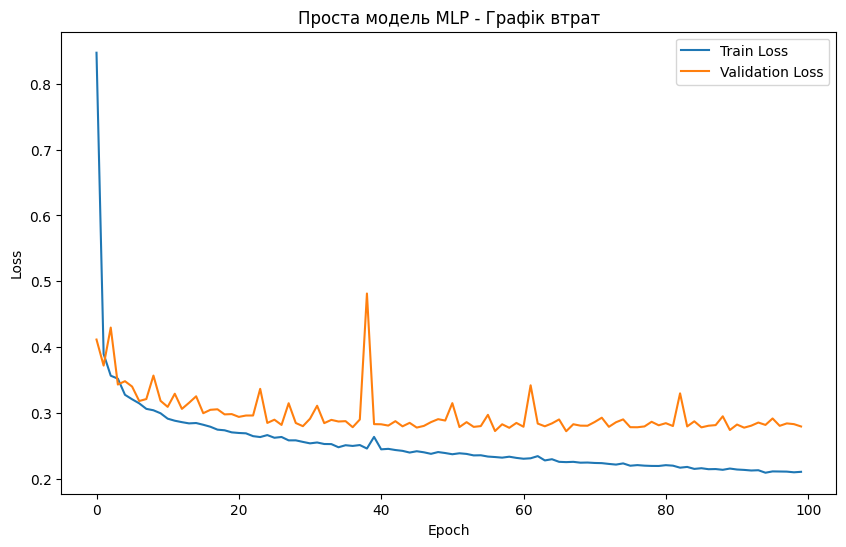

Середньоквадратична похибка на тестовому наборі: 0.2742
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Зразок 1:
  Передбачене значення: 0.4709
  Фактичне значення: 0.4770

Зразок 2:
  Передбачене значення: 1.0668
  Фактичне значення: 0.4580

Зразок 3:
  Передбачене значення: 5.0712
  Фактичне значення: 5.0000

Зразок 4:
  Передбачене значення: 2.7016
  Фактичне значення: 2.1860

Зразок 5:
  Передбачене значення: 2.8571
  Фактичне значення: 2.7800

Зразок 6:
  Передбачене значення: 1.6231
  Фактичне значення: 1.5870

Зразок 7:
  Передбачене значення: 2.2235
  Фактичне значення: 1.9820

Зразок 8:
  Передбачене значення: 1.6960
  Фактичне значення: 1.5750

Зразок 9:
  Передбачене значення: 2.5367
  Фактичне значення: 3.4000

Зразок 10:
  Передбачене значення: 4.8055
  Фактичне значення: 4.4660



In [3]:
def create_simple_mlp(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

simple_mlp = create_simple_mlp(X_train_scaled.shape[1])
simple_mlp.summary()

history_simple = train_model(simple_mlp, X_train_scaled, y_train, X_val_scaled, y_val)
plot_loss(history_simple, "Проста модель MLP - Графік втрат")
evaluate_model(simple_mlp, X_test_scaled, y_test)
predict_samples(simple_mlp, X_test_scaled, y_test)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │        576 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32)        │      2,080 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 16)        │        528 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 16)        │        144 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32)        │          0 │ dense_6[0][0],    │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         33 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,361 (13.13 KB)

 Trainable params: 3,361 (13.13 KB)

 Non-trainable params: 0 (0.00 B)

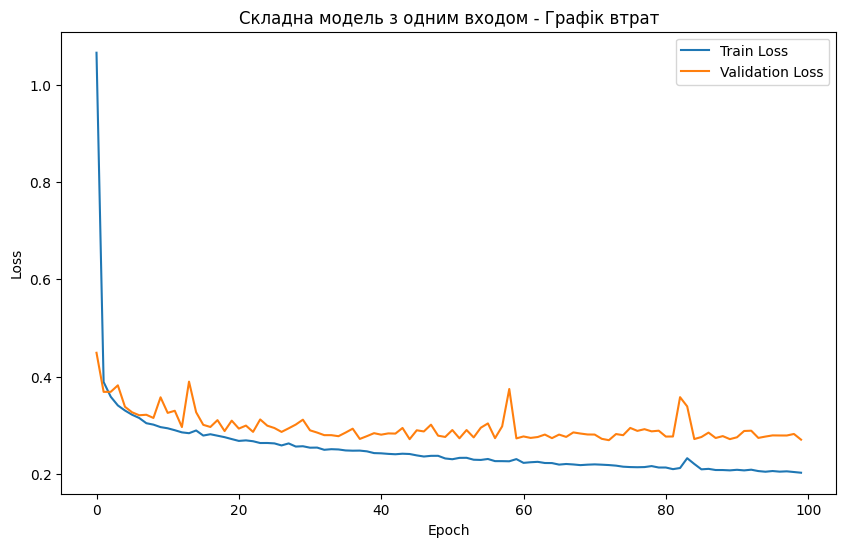

Середньоквадратична похибка на тестовому наборі: 0.2689
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Зразок 1:
  Передбачене значення: 0.4846
  Фактичне значення: 0.4770

Зразок 2:
  Передбачене значення: 1.0832
  Фактичне значення: 0.4580

Зразок 3:
  Передбачене значення: 5.2135
  Фактичне значення: 5.0000

Зразок 4:
  Передбачене значення: 2.5213
  Фактичне значення: 2.1860

Зразок 5:
  Передбачене значення: 2.3824
  Фактичне значення: 2.7800

Зразок 6:
  Передбачене значення: 1.5885
  Фактичне значення: 1.5870

Зразок 7:
  Передбачене значення: 2.2649
  Фактичне значення: 1.9820

Зразок 8:
  Передбачене значення: 1.6043
  Фактичне значення: 1.5750

Зразок 9:
  Передбачене значення: 2.6873
  Фактичне значення: 3.4000

Зразок 10:
  Передбачене значення: 4.5440
  Фактичне значення: 4.4660



In [4]:
def create_complex_model_single_input(input_shape):
    inputs = Input(shape=(input_shape,))
    
    # Глибокий шлях
    deep = Dense(64, activation='relu')(inputs)
    deep = Dense(32, activation='relu')(deep)
    deep = Dense(16, activation='relu')(deep)
    
    # Короткий шлях
    short = Dense(16, activation='relu')(inputs)
    
    # Об'єднання шляхів
    merged = Concatenate()([deep, short])
    outputs = Dense(1)(merged)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

complex_single = create_complex_model_single_input(X_train_scaled.shape[1])
complex_single.summary()

history_complex_single = train_model(complex_single, X_train_scaled, y_train, X_val_scaled, y_val)
plot_loss(history_complex_single, "Складна модель з одним входом - Графік втрат")
evaluate_model(complex_single, X_test_scaled, y_test)
predict_samples(complex_single, X_test_scaled, y_test)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 4)         │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │        320 │ get_item[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │      2,080 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 4)         │          0 │ input_layer_2[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 16)        │        528 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 16)        │         80 │ get_item_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 32)        │          0 │ dense_11[0][0],   │
│ (Concatenate)       │                   │            │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │         33 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,041 (11.88 KB)

 Trainable params: 3,041 (11.88 KB)

 Non-trainable params: 0 (0.00 B)

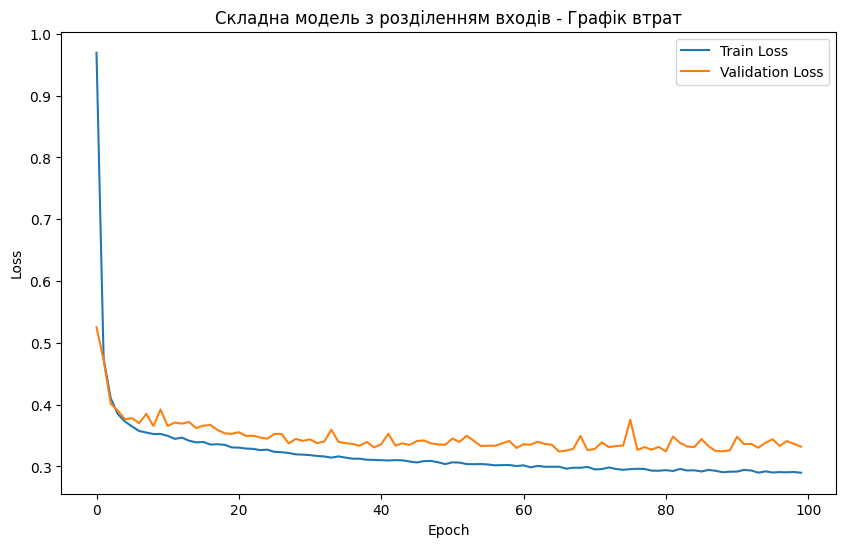

Середньоквадратична похибка на тестовому наборі: 0.3321
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Зразок 1:
  Передбачене значення: 0.1635
  Фактичне значення: 0.4770

Зразок 2:
  Передбачене значення: 1.0135
  Фактичне значення: 0.4580

Зразок 3:
  Передбачене значення: 3.7994
  Фактичне значення: 5.0000

Зразок 4:
  Передбачене значення: 2.5025
  Фактичне значення: 2.1860

Зразок 5:
  Передбачене значення: 2.8129
  Фактичне значення: 2.7800

Зразок 6:
  Передбачене значення: 1.5971
  Фактичне значення: 1.5870

Зразок 7:
  Передбачене значення: 2.5621
  Фактичне значення: 1.9820

Зразок 8:
  Передбачене значення: 1.7514
  Фактичне значення: 1.5750

Зразок 9:
  Передбачене значення: 2.5357
  Фактичне значення: 3.4000

Зразок 10:
  Передбачене значення: 4.4859
  Фактичне значення: 4.4660



In [5]:
def create_complex_model_split_inputs(input_shape):
    inputs = Input(shape=(input_shape,))
    
    # Розділення входів
    deep_inputs = inputs[:, :4]  # Перші 4 ознаки для глибокого шляху
    short_inputs = inputs[:, 4:]  # Решта ознак для короткого шляху
    
    # Глибокий шлях
    deep = Dense(64, activation='relu')(deep_inputs)
    deep = Dense(32, activation='relu')(deep)
    deep = Dense(16, activation='relu')(deep)
    
    # Короткий шлях
    short = Dense(16, activation='relu')(short_inputs)
    
    # Об'єднання шляхів
    merged = Concatenate()([deep, short])
    outputs = Dense(1)(merged)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

complex_split = create_complex_model_split_inputs(X_train_scaled.shape[1])
complex_split.summary()

history_complex_split = train_model(complex_split, X_train_scaled, y_train, X_val_scaled, y_val)
plot_loss(history_complex_split, "Складна модель з розділенням входів - Графік втрат")
evaluate_model(complex_split, X_test_scaled, y_test)
predict_samples(complex_split, X_test_scaled, y_test)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 64)        │        576 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 32)        │      2,080 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 16)        │        528 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 16)        │        144 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 32)        │          0 │ dense_16[0][0],   │
│ (Concatenate)       │                   │            │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 1)         │         33 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ auxiliary_output    │ (None, 1)         │         17 │ dense_16[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,378 (13.20 KB)

 Trainable params: 3,378 (13.20 KB)

 Non-trainable params: 0 (0.00 B)

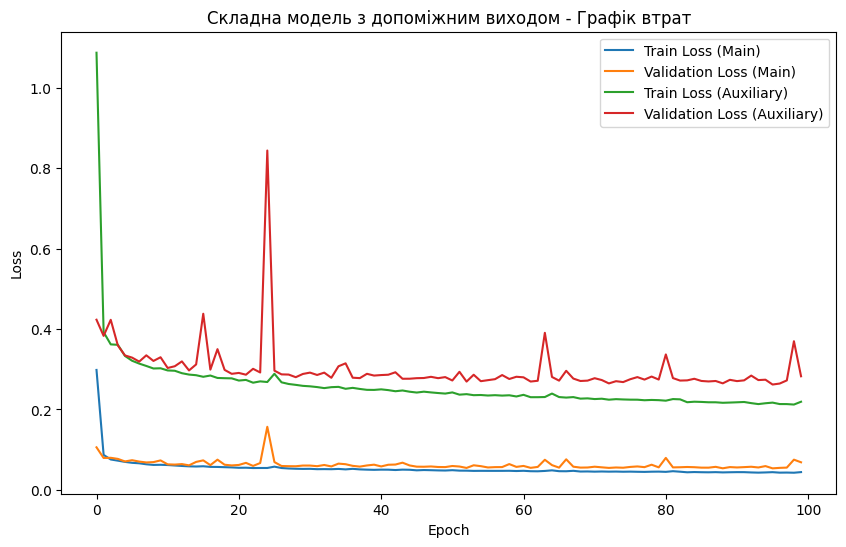

Середньоквадратична похибка на тестовому наборі (головний вихід): 0.0582
Середньоквадратична похибка на тестовому наборі (допоміжний вихід): 0.2878
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Зразок 1:
  Передбачене значення (головний вихід): 0.6055
  Передбачене значення (допоміжний вихід): 0.5868
  Фактичне значення: 0.4770

Зразок 2:
  Передбачене значення (головний вихід): 0.8316
  Передбачене значення (допоміжний вихід): 0.8919
  Фактичне значення: 0.4580

Зразок 3:
  Передбачене значення (головний вихід): 5.3753
  Передбачене значення (допоміжний вихід): 5.3765
  Фактичне значення: 5.0000

Зразок 4:
  Передбачене значення (головний вихід): 2.7053
  Передбачене значення (допоміжний вихід): 2.6107
  Фактичне значення: 2.1860

Зразок 5:
  Передбачене значення (головний вихід): 2.8176
  Передбачене значення (допоміжний вихід): 2.8240
  Фактичне значення: 2.7800

Зразок 6:
  Передбачене значення (головний вихід): 1.6093
  Передбачене значення (допоміжний вихід): 1.5735
  Фактичне значення:

In [6]:
def create_complex_model_auxiliary(input_shape):
    inputs = Input(shape=(input_shape,))
    
    # Глибокий шлях
    deep = Dense(64, activation='relu')(inputs)
    deep = Dense(32, activation='relu')(deep)
    deep = Dense(16, activation='relu')(deep)
    
    # Короткий шлях
    short = Dense(16, activation='relu')(inputs)
    
    # Допоміжний вихід
    auxiliary_output = Dense(1, name='auxiliary_output')(deep)
    
    # Об'єднання шляхів
    merged = Concatenate()([deep, short])
    main_output = Dense(1, name='main_output')(merged)
    
    model = Model(inputs=inputs, outputs=[main_output, auxiliary_output])
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss={'main_output': 'mse', 'auxiliary_output': 'mse'},
                  loss_weights={'main_output': 1.0, 'auxiliary_output': 0.2})
    return model

complex_auxiliary = create_complex_model_auxiliary(X_train_scaled.shape[1])
complex_auxiliary.summary()

history_complex_auxiliary = complex_auxiliary.fit(
    X_train_scaled, [y_train, y_train],
    validation_data=(X_val_scaled, [y_val, y_val]),
    epochs=100, batch_size=32, verbose=0
)

plt.figure(figsize=(10, 6))
plt.plot(history_complex_auxiliary.history['main_output_loss'], label='Train Loss (Main)')
plt.plot(history_complex_auxiliary.history['val_main_output_loss'], label='Validation Loss (Main)')
plt.plot(history_complex_auxiliary.history['auxiliary_output_loss'], label='Train Loss (Auxiliary)')
plt.plot(history_complex_auxiliary.history['val_auxiliary_output_loss'], label='Validation Loss (Auxiliary)')
plt.title("Складна модель з допоміжним виходом - Графік втрат")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

mse = complex_auxiliary.evaluate(X_test_scaled, [y_test, y_test], verbose=0)
print(f"Середньоквадратична похибка на тестовому наборі (головний вихід): {mse[1]:.4f}")
print(f"Середньоквадратична похибка на тестовому наборі (допоміжний вихід): {mse[2]:.4f}")

predictions = complex_auxiliary.predict(X_test_scaled[:10])
for i in range(10):
    print(f"Зразок {i+1}:")
    print(f"  Передбачене значення (головний вихід): {predictions[0][i][0]:.4f}")
    print(f"  Передбачене значення (допоміжний вихід): {predictions[1][i][0]:.4f}")
    print(f"  Фактичне значення: {y_test[i]:.4f}")
    print()

In [8]:
complex_auxiliary.save('complex_model_auxiliary.keras')
np.save('model_history.npy', history_complex_auxiliary.history)